<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


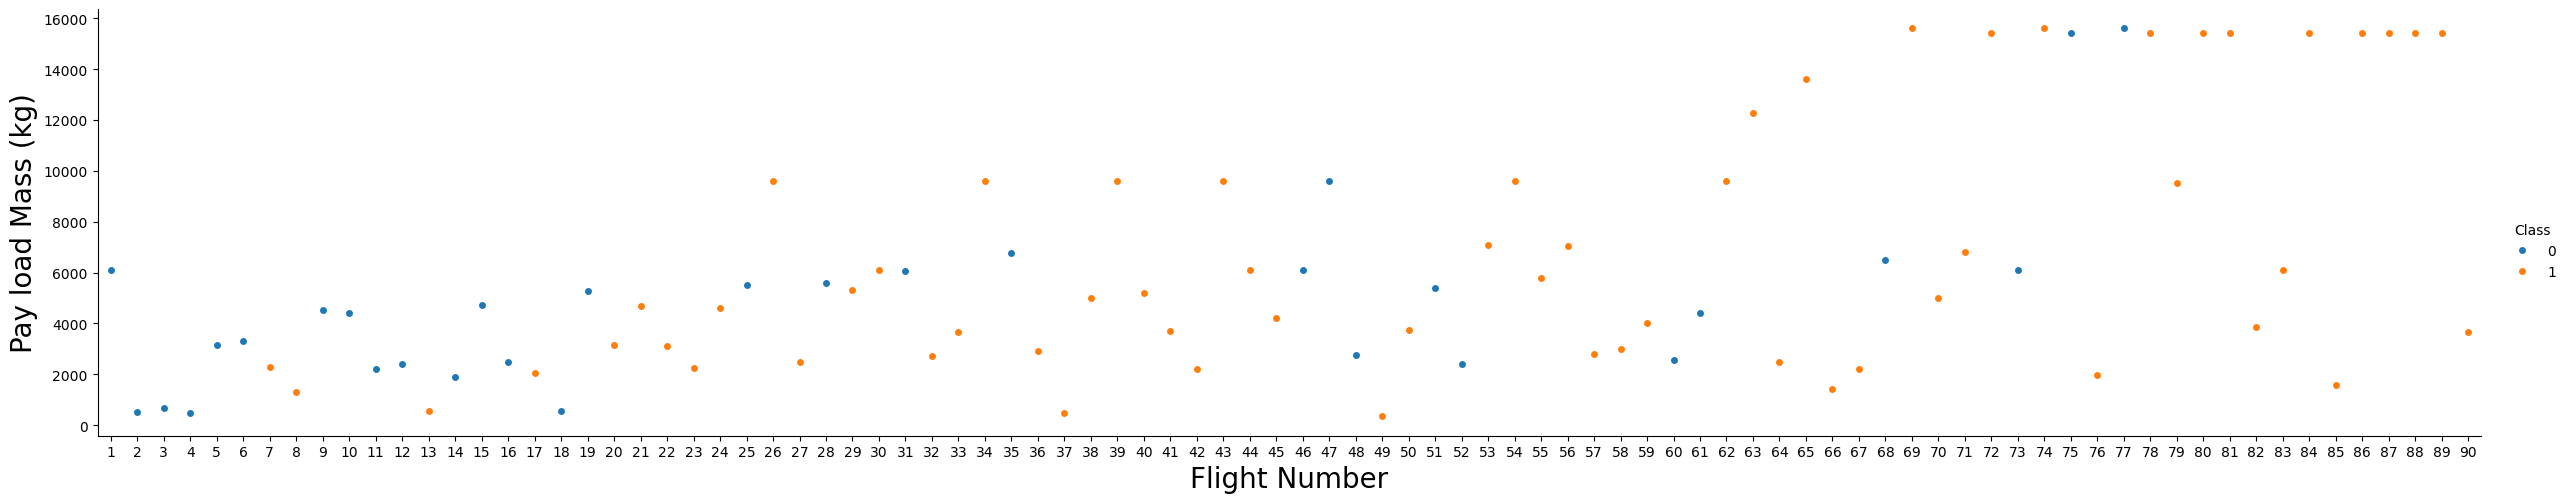

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


Text(0, 0.5, 'Launch Site')

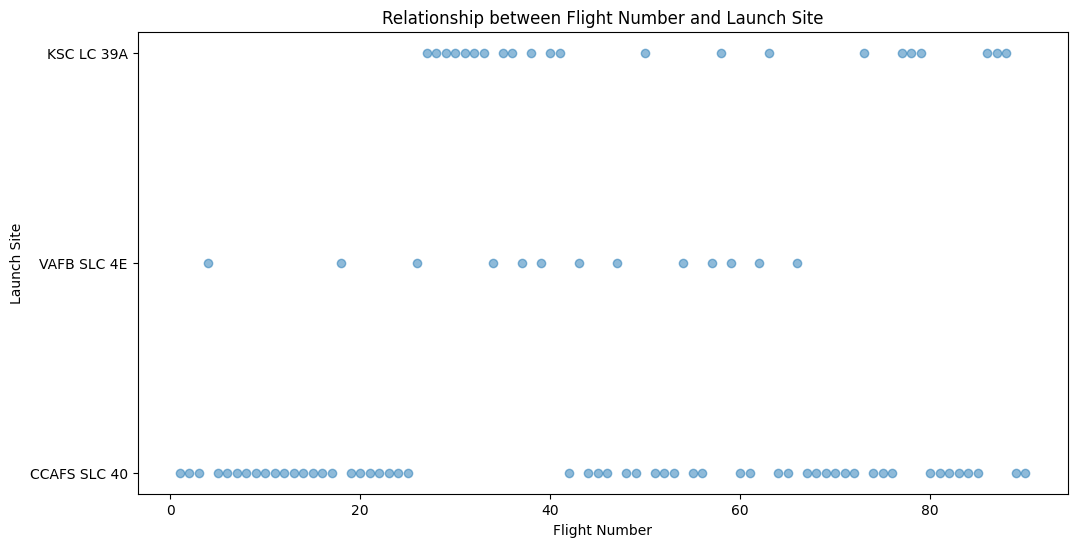

In [7]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
plt.figure(figsize=(12, 6))
plt.scatter(df['FlightNumber'], df['LaunchSite'], alpha=0.5)
plt.title('Relationship between Flight Number and Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


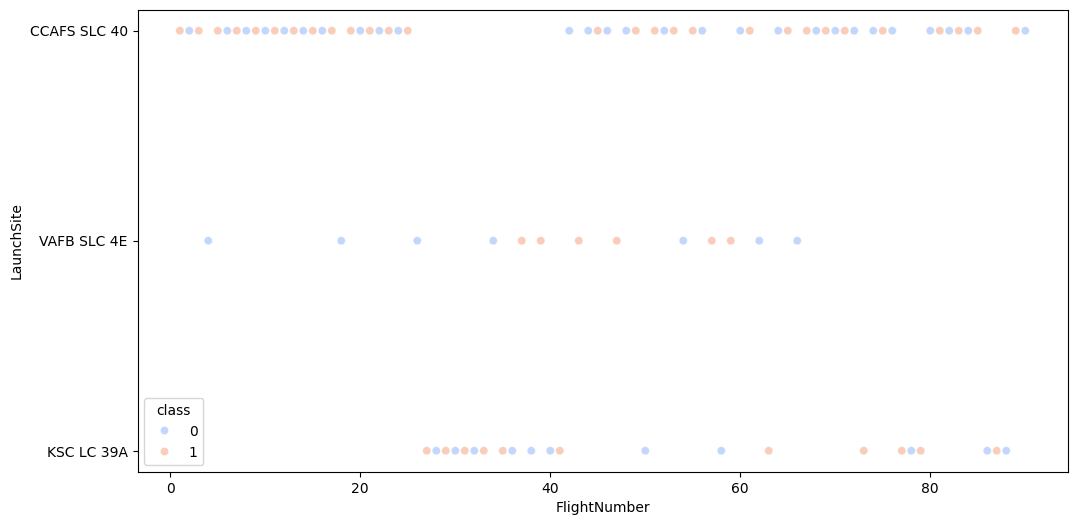

In [9]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
df['class'] = [1 if i % 2 == 0 else 0 for i in range(len(df))]  # This line is just for demonstration
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='class', palette='coolwarm', alpha=0.7)


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


Text(0, 0.5, 'Launch Site')

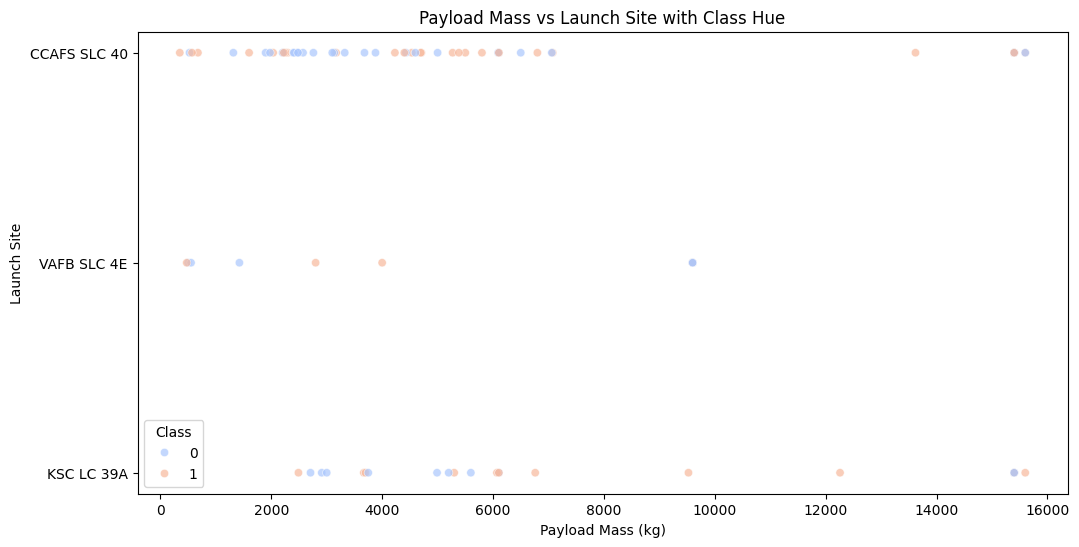

In [13]:
### TASK 2: Visualize the relationship between Payload and Launch Site
df['Class'] = [1 if i % 2 == 0 else 0 for i in range(len(df))]  
df['PayloadMass'] = pd.to_numeric(df['PayloadMass'], errors='coerce')
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', palette='coolwarm', alpha=0.7)
scatter_plot.set_title('Payload Mass vs Launch Site with Class Hue')
scatter_plot.set_xlabel('Payload Mass (kg)')
scatter_plot.set_ylabel('Launch Site')

We also want to observe if there is any relationship between launch sites and their payload mass.


In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


In [17]:
### TASK  3: Visualize the relationship between success rate of each orbit type
orbit_success_rate.columns = ['Orbit', 'SuccessRate']

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=orbit_success_rate, x='Orbit', y='Success Rate', palette='viridis')

bar_plot.set_title('Success Rate by Orbit Type')
bar_plot.set_xlabel('Orbit Type')
bar_plot.set_ylabel('Success Rate')

plt.ylim(0, 1)  
plt.show()

<class 'NameError'>: name 'orbit_success_rate' is not defined

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column

Analyze the ploted bar chart try to find which orbits have high sucess rate.


Text(0, 0.5, 'Orbit Type')

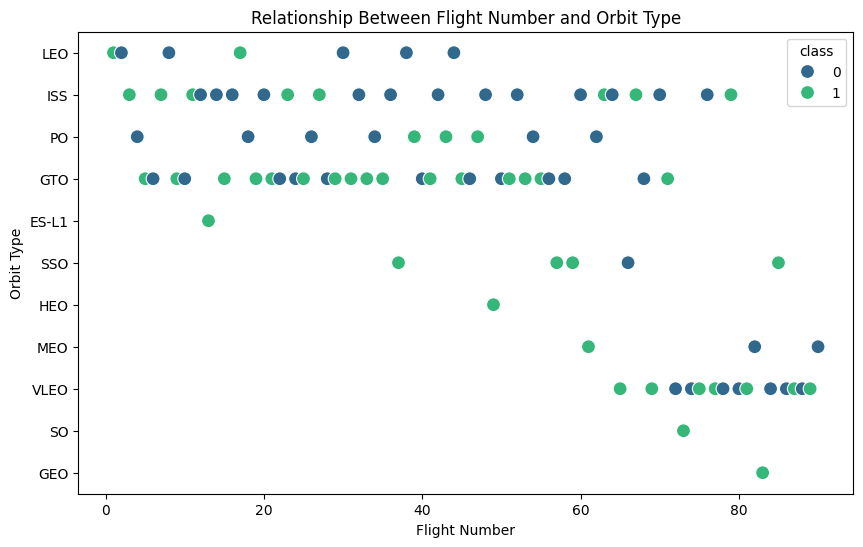

In [18]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='class', palette='viridis', s=100)

# Add titles and labels
scatter_plot.set_title('Relationship Between Flight Number and Orbit Type')
scatter_plot.set_xlabel('Flight Number')
scatter_plot.set_ylabel('Orbit Type')

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


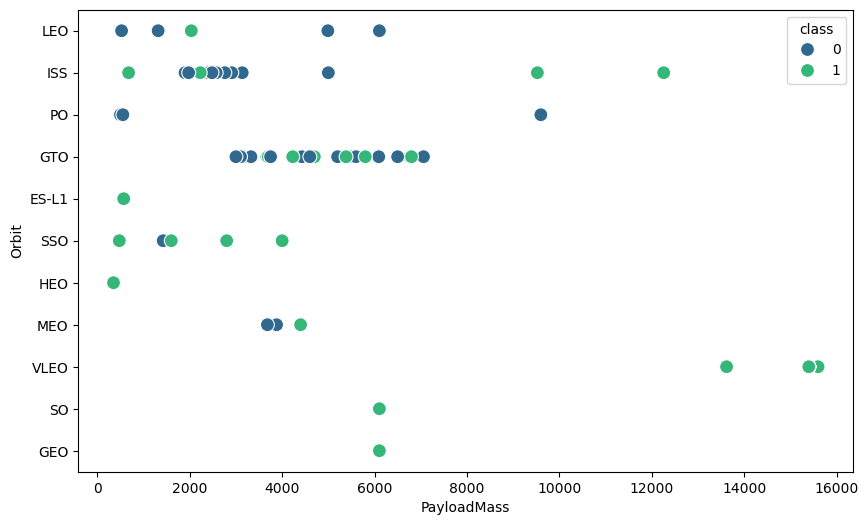

In [19]:
### TASK  5: Visualize the relationship between Payload and Orbit type
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='class', palette='viridis', s=100)


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
